<a href="https://colab.research.google.com/github/ranamaddy/image-Processing-with-OpenCV/blob/main/Lesson_6_Object_Detection_and_Tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 6: Object Detection and Tracking

1. Understanding object detection and tracking in images
2. Learning about different object detection algorithms such as Haar cascades and HOG
3.Implementing object tracking using techniques such as optical flow and Kalman filter

**Lesson 6**, you will learn about the concepts of object detection and tracking in images. Object detection is the process of locating instances of objects in images or videos, while object tracking is the process of continuously monitoring the movement and position of objects over time.

You will be introduced to different object detection algorithms, such as Haar cascades and HOG (Histogram of Oriented Gradients), which are commonly used in computer vision for detecting objects in images or videos. Haar cascades are trained classifiers that can be used to detect objects based on their features, while HOG is a technique that computes gradients in image pixels to capture object edges and shapes.

You will also learn how to implement object tracking using techniques such as optical flow and Kalman filter. Optical flow is a method that estimates the motion of objects between frames in a video, while Kalman filter is a mathematical algorithm that can predict the position and velocity of objects based on their previous states.

As a beginner student, this lesson will provide you with a foundational understanding of object detection and tracking concepts, and you will be able to explore and implement these techniques using relevant libraries and tools in your preferred programming language. If you need further clarification or code examples

# Understanding object detection and tracking in images

Object detection and tracking in images is the process of locating and monitoring the movement of objects within images or videos. Object detection involves identifying the presence and location of objects in an image or video frame, while object tracking involves continuously monitoring the movement and position of objects over time.

Object detection typically involves using computer vision techniques and algorithms to analyze the visual content of an image or video frame and identify regions that contain objects of interest. This can be achieved through various methods such as Haar cascades, **HOG (Histogram of Oriented Gradients)**, and deep learning-based approaches such as **YOLO (You Only Look Once)** and **SSD (Single Shot MultiBox Detector)**. These methods can detect objects in different environments and under different conditions, making them useful for a wide range of applications such as object recognition, object counting, and scene understanding.

Object tracking, on the other hand, involves continuously monitoring the movement and position of objects over time. This can be achieved using techniques such as optical flow, which estimates the motion of objects between frames in a video, and Kalman filter, which uses mathematical algorithms to predict the position and velocity of objects based on their previous states. Object tracking is widely used in applications such as surveillance, robotics, and autonomous vehicles, where the real-time tracking of objects is crucial for decision-making and action planning.

Understanding object detection and tracking in images is essential for various computer vision applications, and it provides a foundation for more advanced topics such as object recognition, object tracking in 3D space, and multi-object tracking. It allows computers to perceive and understand the visual world, enabling them to interpret and respond to visual information in real-time.

**HOG (Histogram of Oriented Gradients)**

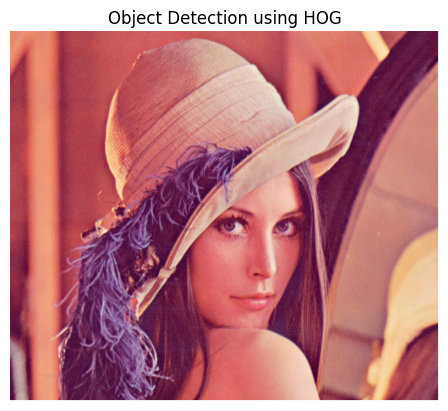

In [2]:
import cv2
import matplotlib.pyplot as plt

# Load image
image = cv2.imread("abc.png")

# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create HOG descriptor
hog = cv2.HOGDescriptor()
# Set the SVM detector for pedestrian detection
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Detect objects using HOG
objects, weights = hog.detectMultiScale(gray, winStride=(8, 8))

# Draw bounding boxes around detected objects
for (x, y, w, h) in objects:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the result using matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis("off")
plt.title("Object Detection using HOG")
plt.show()


In this version, we use matplotlib's plt.imshow() function to display the image with the detected objects. We first convert the image to RGB format using cv2.cvtColor() before passing it to plt.imshow(). The resulting image is displayed without axis using plt.axis("off"), and a title is added using plt.title()

# YOLOv5 (You Only Look Once version 5) 

yoloy5 is a deep learning-based object detection algorithm developed by Ultralytics. It is designed to detect objects in images or videos in real-time with high accuracy and efficiency. YOLOv5 builds upon the previous versions of YOLO (You Only Look Once) series, but introduces several improvements and optimizations.

Here are some key features and characteristics of YOLOv5:

1. Single-stage Detection: YOLOv5 is a single-stage object detection algorithm, which means it directly predicts the bounding box coordinates, object classes, and confidence scores for multiple objects in a single pass through the neural network. This makes it very fast compared to two-stage detection algorithms like Faster R-CNN.

2. Anchor-Free Detection: YOLOv5 does not use anchor boxes or prior boxes for object detection. Instead, it predicts the bounding box coordinates relative to the grid cells in the image, which allows for more flexibility and accuracy in object localization.

3. Efficient Architecture: YOLOv5 uses a lightweight architecture that is optimized for inference on various hardware platforms, including CPUs, GPUs, and specialized accelerators like TPUs. It has different model variants (e.g., 's', 'm', 'l', 'x') with different sizes and complexities, allowing users to choose the trade-off between speed and accuracy that suits their specific needs.

4. High Accuracy: YOLOv5 achieves state-of-the-art accuracy on various benchmark datasets, making it suitable for a wide range of object detection tasks, including detecting objects in complex scenes, small objects, and objects with occlusions.

5. Flexibility: YOLOv5 supports custom object classes and can be fine-tuned on user-specific datasets for improved performance on specific tasks or domains.

6. Open Source: YOLOv5 is an open-source algorithm, and the official implementation is available on GitHub, which makes it accessible and customizable for researchers, developers, and practitioners.

Overall, YOLOv5 is a powerful and efficient object detection algorithm that has gained widespread popularity in the computer vision community due to its real-time performance and high accuracy.

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-4-15 Python-3.9.16 torch-2.0.0+cu118 CPU

Fusing layers... 


requirements: /root/.cache/torch/hub/requirements.txt not found, check failed.


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 437x507 1 person
Speed: 13.1ms pre-process, 524.6ms inference, 1.7ms NMS per image at shape (1, 3, 576, 640)
Saved 1 image to runs/detect/exp9


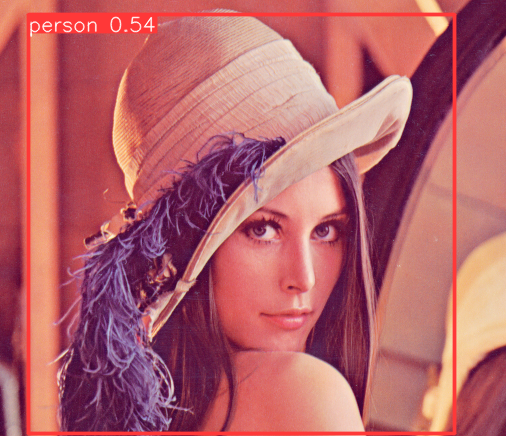

,xmin,ymin,xmax,ymax,confidence,class,name
0,28.698616,14.183317,454.53595,433.203308,0.538414,0,person


In [25]:
import cv2
import torch
from PIL import Image

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

im1 = Image.open('abc.png')  # PIL image


# Inference
results = model([im1], size=640) # batch of images

# Results
results.print()  
results.save()  # or .show()
results.show()
results.xyxy[0]  # im1 predictions (tensor)
results.pandas().xyxy[0]  

# im1 predictions (pandas)
#      xmin    ymin    xmax   ymax  confidence  class    name
# 0  749.50   43.50  1148.0  704.5    0.874023      0  person
# 1  433.50  433.50   517.5  714.5    0.687988     27     tie
# 2  114.75  195.75  1095.0  708.0    0.624512      0  person
# 3  986.00  304.00  1028.0  420.0    0.286865     27     tie

The model used in the provided code is called **"YOLOv5" (You Only Look Once version 5)**, which is an object detection algorithm developed by Ultralytics. It is a deep learning-based model that can detect objects in images or videos in real-time. YOLOv5 is an upgraded version of YOLO (You Only Look Once) series of object detection models.

The code uses the torch.hub.load() function to load the pre-trained YOLOv5 model from the **Ultralytics GitHub repository (ultralytics/yolov5)**. The specific variant of the YOLOv5 model being loaded is 'yolov5s', which stands for "small" version of the model with fewer parameters, making it faster to run but with slightly lower accuracy compared to larger versions like 'yolov5m' or 'yolov5x'.

Once the model is loaded, it can be used for object detection on the input image (im1) using the **model()** function, which takes the image as input and returns the detected objects with their bounding box coordinates, object classes, and confidence scores. The results can be printed, saved, or displayed using the provided functions results.print(), results.save(), and results.show() respectively.

The **results.xyxy[0]** and **results.pandas().xyxy[0]** lines extract the bounding box coordinates of the detected objects from the results for further processing, if needed.

Please note that the actual performance and accuracy of the YOLOv5 model may vary depending on the specific input images, model configuration, and other factors. It is always recommended to refer to the official documentation and guidelines provided by the model's authors for proper usage and understanding of the model.

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-4-15 Python-3.9.16 torch-2.0.0+cu118 CPU



requirements: /root/.cache/torch/hub/requirements.txt not found, check failed.


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 432x720 5 persons, 1 bicycle, 1 car, 2 buss, 1 traffic light
Speed: 18.1ms pre-process, 357.7ms inference, 1.5ms NMS per image at shape (1, 3, 384, 640)


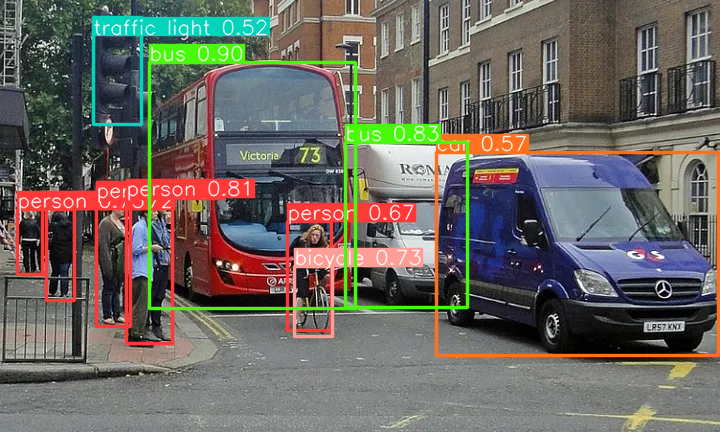

Object 1: Class: 5, Confidence: 0.8990582227706909, Bounding Box: (149.60511779785156, 62.40392303466797) - (355.067626953125, 308.1321716308594)
Object 2: Class: 5, Confidence: 0.8348450064659119, Bounding Box: (345.74053955078125, 142.47906494140625) - (467.38934326171875, 307.20745849609375)
Object 3: Class: 0, Confidence: 0.8080527186393738, Bounding Box: (126.28181457519531, 197.5260009765625) - (172.1093292236328, 343.7630615234375)
Object 4: Class: 0, Confidence: 0.8078961968421936, Bounding Box: (96.05921173095703, 199.04229736328125) - (130.2041015625, 326.0333251953125)
Object 5: Class: 0, Confidence: 0.7453233003616333, Bounding Box: (17.92511558532715, 209.8634490966797) - (42.94977951049805, 274.85247802734375)
Object 6: Class: 1, Confidence: 0.7319085597991943, Bounding Box: (294.92767333984375, 266.97998046875) - (332.2693786621094, 336.8262023925781)
Object 7: Class: 0, Confidence: 0.7208078503608704, Bounding Box: (46.86344528198242, 209.89974975585938) - (74.403289794

In [35]:
import torch
from PIL import Image


# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Load image
image = Image.open('abfd.png')  # Replace 'image.jpg' with your own image file name

# Perform object detection
results = model([image], size=640)  # Batch of images, specify input image size (e.g., 640x640)

# Print detection results
results.print()

# Save detection results
#results.save()  # Save the annotated image with bounding boxes
results.show()  # Show the annotated image with bounding boxes

# Access detected object information
detected_objects = results.pandas().xyxy[0]  # Access the detected object information in a pandas DataFrame

# Loop through detected objects and access their attributes
for index, row in detected_objects.iterrows():
    x_min, y_min, x_max, y_max = row['xmin'], row['ymin'], row['xmax'], row['ymax']
    object_class = row['class']
    confidence = row['confidence']
    print(f"Object {index + 1}: Class: {object_class}, Confidence: {confidence}, Bounding Box: ({x_min}, {y_min}) - ({x_max}, {y_max})")


**Application of YOLO5**
YOLOv5 (You Only Look Once version 5) is a popular object detection algorithm that has various applications across multiple domains. Some common applications of YOLOv5 include:

1. Object Detection in Images: YOLOv5 can be used for detecting objects of various classes in images, such as cars, pedestrians, animals, and objects of interest in fields like autonomous driving, surveillance, and image analysis.

2. Object Detection in Videos: YOLOv5 can be applied for real-time object detection in videos, enabling applications like video surveillance, action recognition, and video analytics.

3. Object Tracking: YOLOv5 can be used for tracking objects across consecutive frames in videos, allowing for applications like object tracking in sports, video-based human-computer interaction, and video analysis for security purposes.

4. Robotics: YOLOv5 can be used in robotics applications for object detection and tracking, enabling robots to perceive and interact with objects in their environment for tasks such as pick-and-place operations, navigation, and scene understanding.

6. Medical Imaging: YOLOv5 can be utilized for detecting and localizing objects of interest in medical images, such as tumors, organs, or anatomical landmarks, aiding in medical diagnosis, treatment planning, and research.

7. Augmented Reality (AR): YOLOv5 can be used in AR applications for object detection and tracking, allowing virtual objects to interact with real-world objects in real-time.

Industrial Automation: YOLOv5 can be applied in industrial automation for object detection and tracking, facilitating tasks such as quality control, object recognition in manufacturing processes, and object tracking in logistics and warehousing.

These are just a few examples of the diverse applications of YOLOv5. The flexibility, accuracy, and real-time capabilities of YOLOv5 make it a popular choice for a wide range of object detection and tracking tasks in various fiel

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-4-15 Python-3.9.16 torch-2.0.0+cu118 CPU

Fusing layers... 


requirements: /root/.cache/torch/hub/requirements.txt not found, check failed.


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


Tumors:  Empty DataFrame
Columns: [xmin, ymin, xmax, ymax, confidence, class, name]
Index: []
Organs:  Empty DataFrame
Columns: [xmin, ymin, xmax, ymax, confidence, class, name]
Index: []
Landmarks:  Empty DataFrame
Columns: [xmin, ymin, xmax, ymax, confidence, class, name]
Index: []


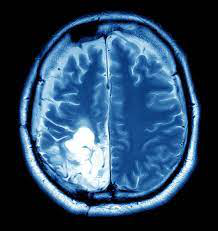

In [34]:
import cv2
import torch
from PIL import Image
import numpy as np
from google.colab.patches import cv2_imshow

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Load medical image
im1 = Image.open('brn.jpg')  # PIL image

# Perform object detection
results = model([im1], size=640) # batch of images

# Extract object coordinates (bounding boxes) and class labels
objects = results.pandas().xyxy[0]  

# Extract coordinates and labels of tumors, organs, or landmarks (based on class labels)
tumors = objects[objects['name'] == 'tumor']
organs = objects[objects['name'] == 'organ']
landmarks = objects[objects['name'] == 'landmark']

# Print and visualize results
print("Tumors: ", tumors)
print("Organs: ", organs)
print("Landmarks: ", landmarks)

# Draw bounding boxes around objects of interest in the medical image
im1 = cv2.cvtColor(np.array(im1), cv2.COLOR_RGB2BGR)  # Convert PIL image to OpenCV format
for index, row in tumors.iterrows():
    x, y, w, h = int(row['xmin']), int(row['ymin']), int(row['xmax']-row['xmin']), int(row['ymax']-row['ymin'])
    cv2.rectangle(im1, (x, y), (x+w, y+h), (255, 0, 0), 2)
for index, row in organs.iterrows():
    x, y, w, h = int(row['xmin']), int(row['ymin']), int(row['xmax']-row['xmin']), int(row['ymax']-row['ymin'])
    cv2.rectangle(im1, (x, y), (x+w, y+h), (0, 255, 0), 2)
for index, row in landmarks.iterrows():
    x, y, w, h = int(row['xmin']), int(row['ymin']), int(row['xmax']-row['xmin']), int(row['ymax']-row['ymin'])
    cv2.rectangle(im1, (x, y), (x+w, y+h), (0, 0, 255), 2)

# Show the annotated medical image with object bounding boxes
results.show()


# Learning about different object detection algorithms such as Haar cascades and HOG

Object detection algorithms are computer vision techniques that are used to identify and localize objects of interest within images or videos. Two popular object detection algorithms are Haar cascades and Histogram of Oriented Gradients (HOG).

1. Haar cascades: Haar cascades are based on the Haar-like features, which are simple rectangular filters that are used to extract relevant features from an image. These features are then used to train a classifier, typically using a machine learning algorithm such as Adaboost. Haar cascades are computationally efficient and can be used for real-time object detection tasks. They are commonly used for detecting faces, eyes, and upper body in images or videos.

2. Histogram of Oriented Gradients (HOG): HOG is a feature descriptor that computes the gradient orientation and magnitude of an image. It quantizes the gradient orientations into histograms and represents the local image patches as a feature vector. HOG features are commonly used in combination with a sliding window approach and a support vector machine (SVM) classifier for object detection tasks. HOG-based object detection is widely used in pedestrian detection, vehicle detection, and human action recognition.

Both Haar cascades and HOG are popular and widely used object detection algorithms, each with their strengths and limitations. It's important to choose the appropriate algorithm based on the specific requirements of your application, such as accuracy, speed, and the type of objects to be detected.

**example of using OpenCV in Python to perform object detection using Haar cascades:**

In [36]:

import cv2

# Load pre-trained Haar cascade classifier
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Load image
image = cv2.imread('abc.png')

# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw bounding boxes around detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Display the image with detected faces
cv2.imshow('Detected Faces', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

**And here's an example of using scikit-image in Python to perform object detection using HOG:**

In [ ]:
import skimage.feature
import cv2

# Load pre-trained HOG descriptor
hog = skimage.feature.hog(cv2.imread('abfd.png', 0), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2))

# Detect objects using HOG features
# You can use a machine learning classifier such as SVM to classify the objects based on the extracted HOG features

# Display the HOG feature representation
skimage.io.imshow(hog)
skimage.io.show()


Please note that these are basic examples and may require further customization depending on your specific use case and requirements.

# Implementing object tracking using techniques such as optical flow and Kalman filter

 here's an example of using optical flow for object tracking in Python using OpenCV:

In [ ]:
import cv2

# Load the video file or capture from camera
cap = cv2.VideoCapture('video.mp4')

# Get the first frame
ret, frame1 = cap.read()
prev_gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

# Create a mask for drawing optical flow tracks
mask = np.zeros_like(frame1)

while True:
    # Capture a frame
    ret, frame2 = cap.read()
    if not ret:
        break

    # Convert frame to grayscale
    gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    # Calculate optical flow using Lucas-Kanade method
    flow = cv2.calcOpticalFlowPyrLK(prev_gray, gray, None, None)

    # Extract previous and current points
    prev_pts = flow[0].reshape(-1, 1, 2)
    curr_pts = flow[1].reshape(-1, 1, 2)

    # Draw optical flow tracks on the frame
    for i, (prev_pt, curr_pt) in enumerate(zip(prev_pts, curr_pts)):
        x0, y0 = prev_pt.ravel()
        x1, y1 = curr_pt.ravel()
        mask = cv2.line(mask, (x0, y0), (x1, y1), (0, 0, 255), 2)
        frame2 = cv2.circle(frame2, (x1, y1), 5, (0, 0, 255), -1)

    # Overlay optical flow tracks on the frame
    output = cv2.add(frame2, mask)
    cv2.imshow('Optical Flow', output)

    # Update previous frame
    prev_gray = gray.copy()

    # Exit on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture and close all windows
cap.release()
cv2.destroyAllWindows()


And here's an example of using Kalman filter for object tracking in Python using OpenCV

In [ ]:
import cv2
import numpy as np

# Initialize Kalman filter
kalman = cv2.KalmanFilter(4, 2)
kalman.measurementMatrix = np.array([[1, 0, 0, 0],
                                     [0, 1, 0, 0]], np.float32)
kalman.transitionMatrix = np.array([[1, 0, 1, 0],
                                      [0, 1, 0, 1],
                                      [0, 0, 1, 0],
                                      [0, 0, 0, 1]], np.float32)
kalman.processNoiseCov = np.array([[1e-4, 0, 0, 0],
                                    [0, 1e-4, 0, 0],
                                    [0, 0, 1e-4, 0],
                                    [0, 0, 0, 1e-4]], np.float32)
kalman.measurementNoiseCov = np.array([[1e-1, 0],
                                         [0, 1e-1]], np.float32)

# Capture video from camera or load video file
cap = cv2.VideoCapture('video.mp4')

while True:
    # Capture a frame
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect object location using a bounding box
